***
# Wind Turbine Linear Regression.
***

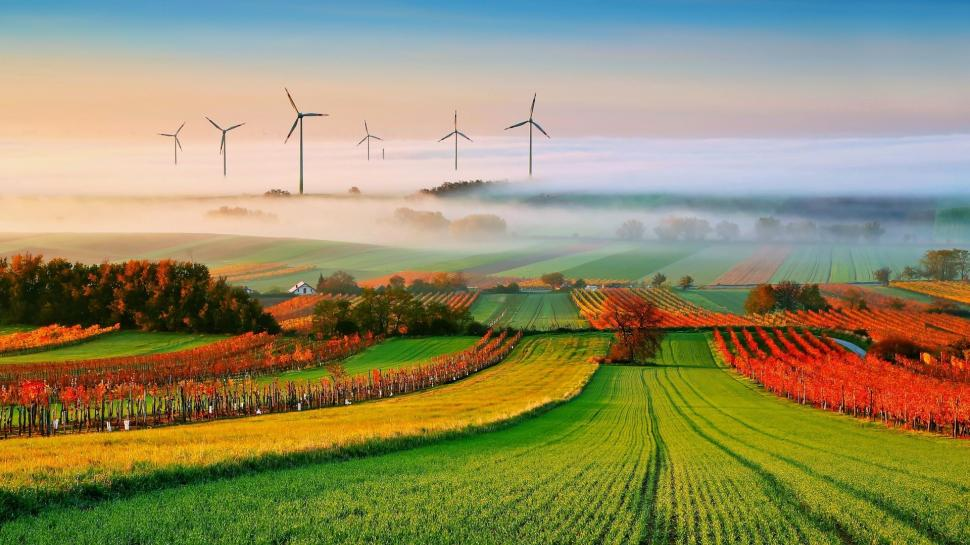

***
### Aim:
***

An investigation into various forms of linear regression applied to power curves of wind turbines in the hope of achieving the best possible fit to the data given.

***
##### Imports & Preferences:

In [38]:
# Numerical array and fitting lines:
import numpy as np

#Plots:
import matplotlib.pyplot as plt

# Calculations
import math

# Dealing with Dataframes:
import pandas as pd

# Visualisation
import seaborn as sns

# more mathematical functions
import scipy
from scipy.stats import spearmanr

In [39]:
# Nicer plot style:
plt.style.use('ggplot')

# Bigger plots:
plt.rcParams['figure.figsize'] = (18,10)

***
What comes next is the finished product of much trial and tribulation. I have included the entire process beneath the bibliography, in case the discovery element is of any value to the project. However, once the problem was solved it rendered all of that work redundant, as I had been working with faulty numbers.

After analysing the problem extensively, I finally noticed that the coeficient y intercept was positive at 0. This would make no sense, as there would be energy generated from zero wind speed. The inverse is expected, since only at around 5 m/s does the WT start to generate power. I went back over the model and realised I had derived the coefficients for the inverse of the graph, and as a result had skewed every result after that. As soon as I fixed the coefficients, everything else made much more sense.
***

***
#### Data:

In [40]:
# Import data
data = 'https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv'

df = pd.read_csv(data)
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


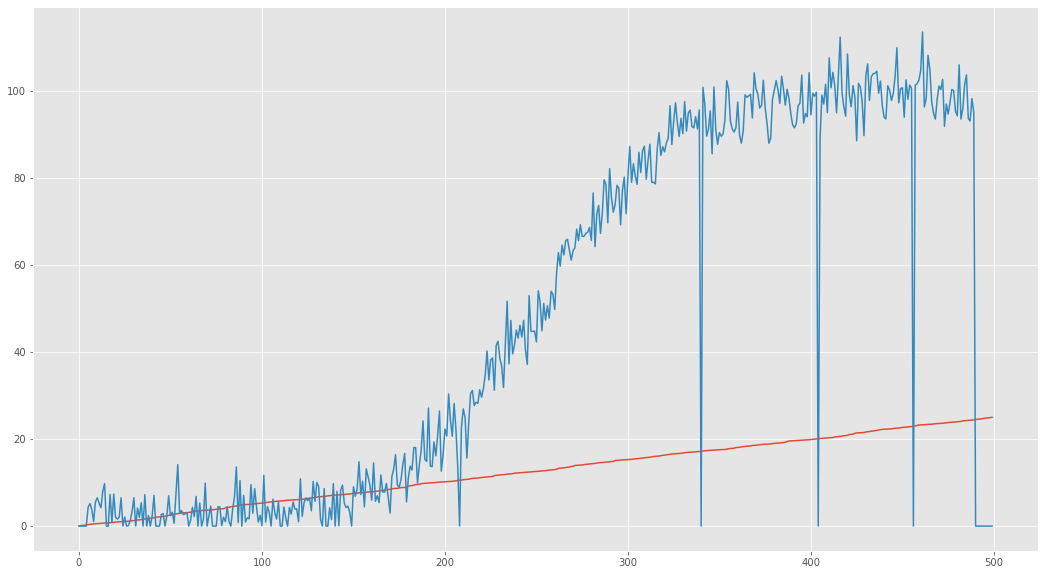

In [41]:
# Visualise Data:
plt.plot(df)

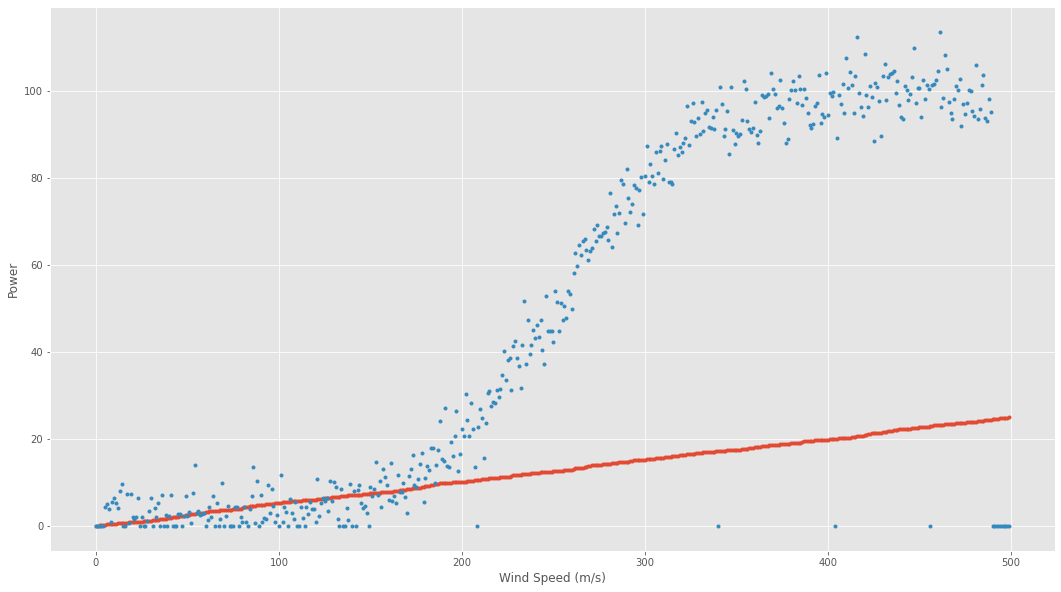

In [42]:
# Use dots instead:
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Power')
plt.plot(df, '.')

Straight away we can see that the model is unsuitable for a simple linear regression model. The dots do not seem to follow a singular straight linear slope, meaning large parts of the data would be totally misrepresented by the general average in terms of a simple linear model.

As a result, it is apparent early on that a different form of linear regression would be more suitable.

It is also probably important to note the dots on the bottom of the graph. These are 0 values that are so far from the rest that they are almost certainly anomolies. The ones at the end show consistency, so it would be fair to assume that after a certain point the WT's ability to produce power shits down due to overload just before 500m/s. These ouliers may be worth cleaning out of the data, but for now we will leave them in and see how it goes.

All that said, let's give simple linear regression a go to see what our result may be:

In [43]:
# Find coefficients:
coeffs = np.polyfit(df['speed'], df['power'], 1)
coeffs


# These are in relation to y = mx + c
# m is the value of y when x = 1
# c is the y intercept, when x = 0

array([  4.91759567, -13.89990263])

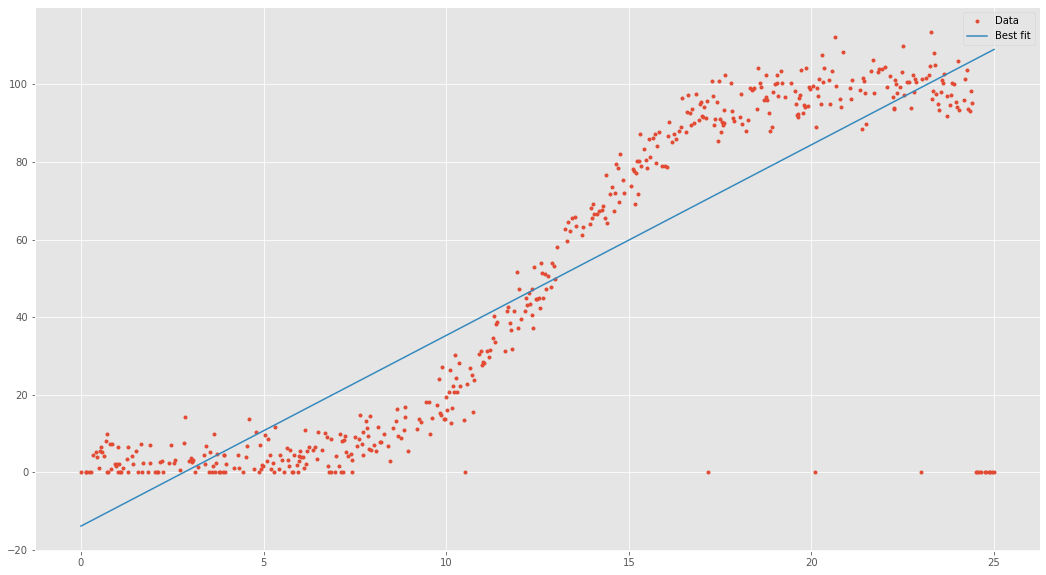

In [44]:
# Treat speed data as x axis:
plt.plot(df['speed'], df['power'], '.', label='Data')
plt.plot(df['speed'], coeffs[0] * df['speed'] + coeffs[1], '-', label='Best fit')
plt.legend();

As we can see, the cost is extremely high with this regression.

In [45]:
# Calculate the cost of the line:
cost = lambda m,c: np.sum([(df['power'][i] - m * df['speed'][i] - c)**2 for i in range(df['speed'].size)])

print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (4.91759567, -13.89990263, cost(4.91759567, -13.89990263)))

Cost with m =  4.92 and c = -13.90: 234241.16


So as you can see, although it is a good average of all the dots,it misrepresents most of them, showing that a straight line cannot work on certain data sets.

***
#### Using the logistics Function.
***

As it turns out, according to the paper by authors Daniel Villanuevam & Andrés E.Feijóo, [3] there are many different models to best accomodate the power curve of a given Wind Turbine.

Some models are based on polynomial equations, such as linear, quadratic, cubic, least-square and spline, amongst others. These models, however, are piecewise due to the specific shape of the power curve, and thus they are ultimitely limited by their rather low quality granular punctuation. 

A better alternative is a contiuous function. This has many benfefits, most notably greater dynamic accuracy, but also in terms of better practice with large data sets. Instead of storing each point of a piecewise model, the function itself is all that need be stored, to be fed inputs when needed for a given situation.

Based on said paper, which references a multitude of other approaches, the most accurate and efficient model for following the power curve is the 'Logistic Function', as shown below:

$$ P(u) = a* \frac{1 + me^{-u/t}}
{1 + ne^{-u/t}} $$

The equation is explained quite simply:

'P(u)' is the power output when u is a given windspeed. 

"e" is a numerical constant that is equal to 2.71828, related to non-linear increase or decrease in statistics. [1]

a, m, n, t are parameters specific to a particular model of wind turbine, and are derived by incredibly complex processes, as described here:

>parameters of these expressions have been solved using advanced algorithms like genetic algorithm (GA), evolutionary programming (EP), particle swarm optimization (PSO), and differential evolution (DE). Nonparametric models have been evolved using algorithms like neural networks, fuzzy c-means clustering, and data mining. [2]

Based on the fact that the tables of parameters given in [3] match up with the parameters in the lecture on this problem, it is most likely safe to assume that the data we are working with is from a Vestas V80:

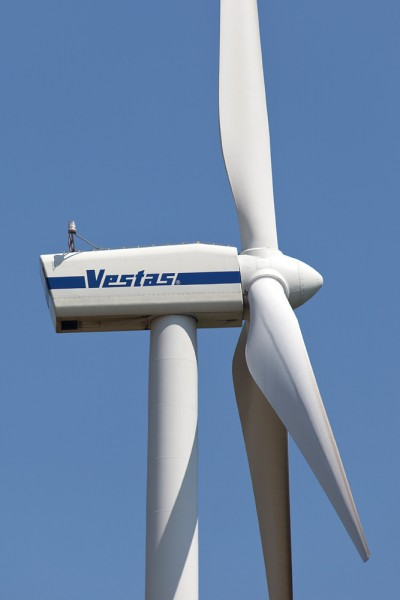

In [46]:
# Define parameters: vestas V80
a, m, n, t = 2011.1, 2.6650, 622.922, 1.40900

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

In [47]:
dfx = pd.DataFrame({'Wind Speed': u, 'Power': P_u})
dfx

,Wind Speed,Power
0,0.00000,11.813466
1,0.03003,11.882492
2,0.06006,11.953000
3,0.09009,12.025021
4,0.12012,12.098589
...,...,...
995,29.87988,2011.099231
996,29.90991,2011.099247
997,29.93994,2011.099263
998,29.96997,2011.099278


In [50]:
# Define parameters: vestas V80
a, m, n, t = 103.5, 4.92, 622.922, 1.40900

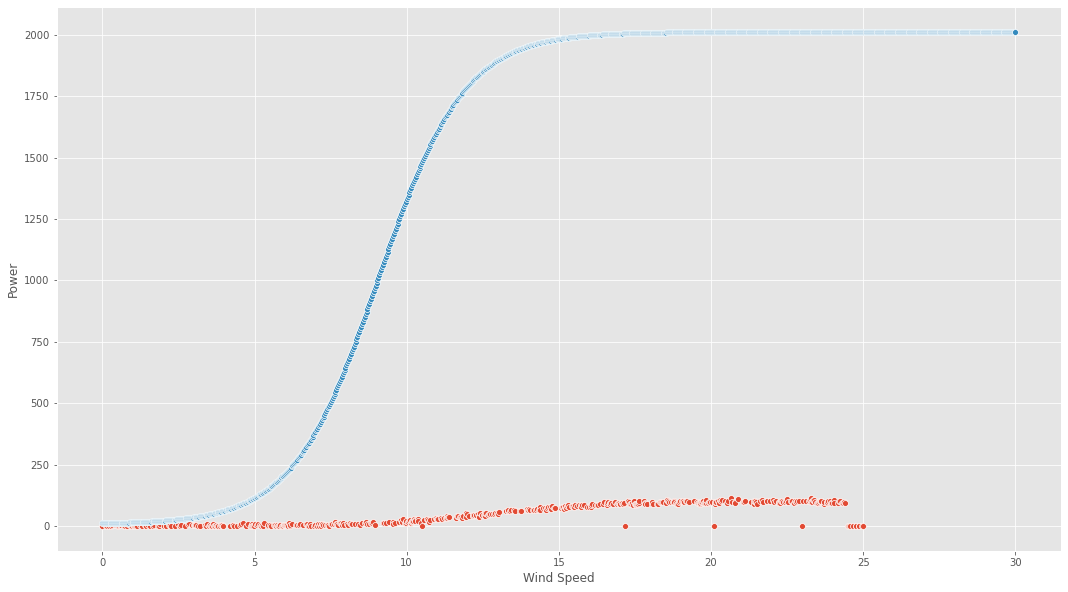

In [52]:
u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y='Power');

***
#### Bibliography:
***

[1] https://www.nde-ed.org/EducationResources/Math/Math-e.htm

[2] https://ieeexplore.ieee.org/abstract/document/6491505

[3] https://www.sciencedirect.com/science/article/pii/S0378779616300992

[4] Dta : https://learnonline.gmit.ie/course/view.php?id=1120

[5] A Critical Review on Wind Turbine Power Curve Modelling Techniques and Their Applications in Wind Based Energy Systems: Vaishali Sohooni: https://www.hindawi.com/journals/jen/2016/8519785/Vaishali

[7] Wind Turbine Power Curve: Iain Staffell
file:///C:/Users/codes/Downloads/Wind_Turbine_Power_Curves.pdf


***
### Discovery process when coefficients were reversed:
***

In [53]:
# Find coefficients:
coeffs = np.polyfit(df['power'], df['speed'], 1)
coeffs

array([0.14823017, 5.4731882 ])

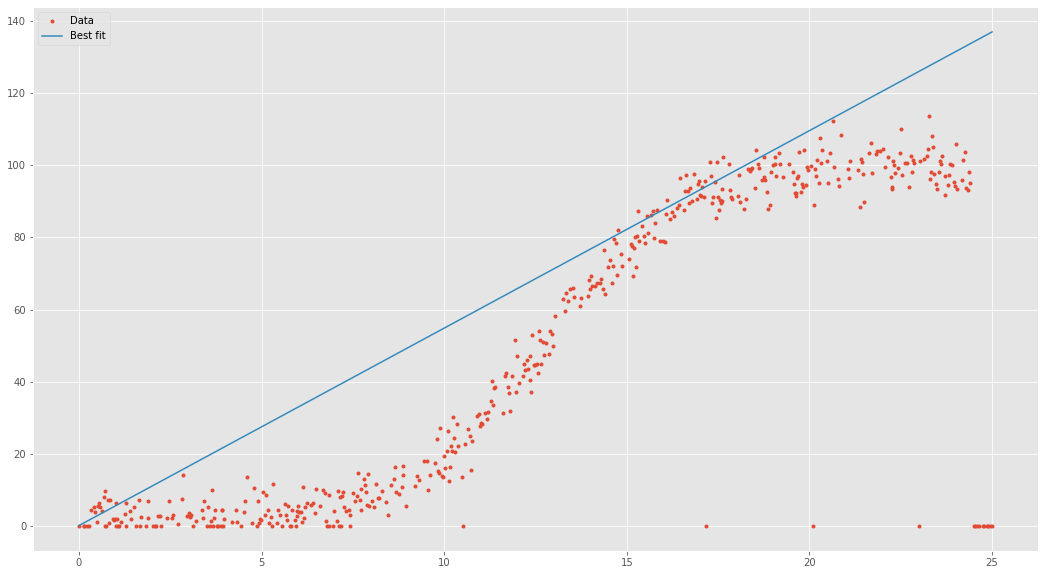

In [14]:
# Plot Speed data on x, power on y:
plt.plot(df['speed'], df['power'], '.', label='Data')
plt.plot(df['speed'], coeffs[1] * df['speed'] + coeffs[0], '-', label='Best fit')
plt.legend();

In [15]:
# Calculate cost of line:
cost1 = lambda m,c: np.sum([(df['speed'][i] - m * df['power'][i] - c)**2 for i in range(df['power'].size)])

In [16]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.14823017, 5.4731882, cost1(0.14823017, 5.4731882)))

Cost with m =  0.15 and c =  5.47:  7060.69


When writing out the above code, I accidentally inverted the axis when inputting the equation. Funnily enough, but for reasons I do not fully understand yet, the line appears to be a much better fit. It still is far from perfect, but I thought it was worth noting...

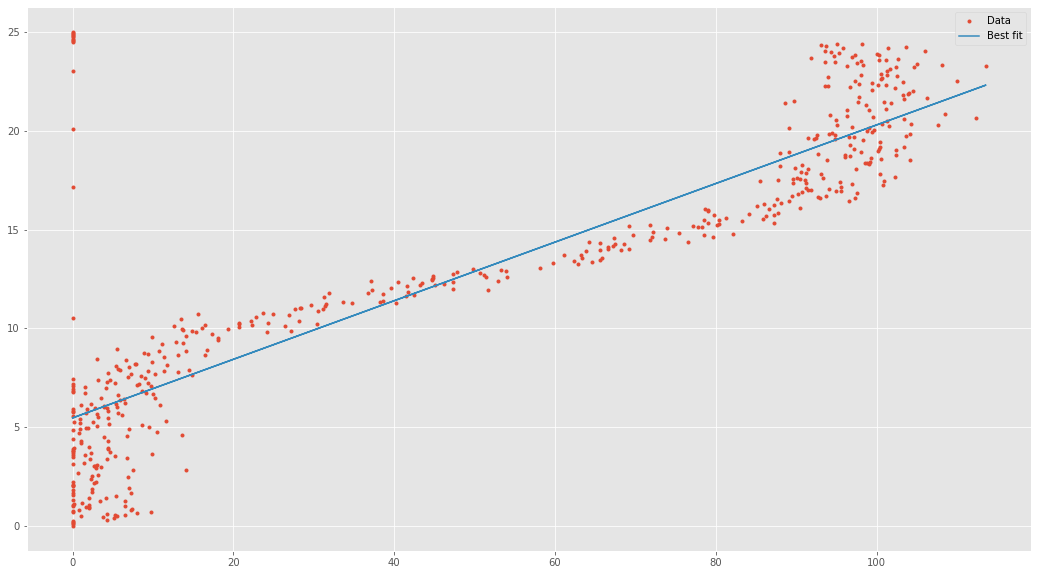

In [17]:
# Treat power data as x 
plt.plot(df['power'], df['speed'], '.', label='Data')
plt.plot(df['power'], coeffs[0] * df['power'] + coeffs[1], '-', label='Best fit')
plt.legend();

In [18]:
# Calculate the cost of the line:
cost2 = lambda m,c: np.sum([(df['power'][i] - m * df['speed'][i] - c)**2 for i in range(df['speed'].size)])

In [19]:
print("Cost with m = %5.2f and c = %5.2f: %8.2f" % (0.14823017, 5.4731882, cost2(0.14823017, 5.4731882)))

Cost with m =  0.15 and c =  5.47: 1653984.80


Here we can see that the cost of the second line is actually far higher, which shows that even though the line appears to be fitting the shape of the curve beeter than the first one, the calculated overall cost is actually far higher. This must be due to the fact that the first line at least does a good job of fitting to aportion of the plot before it goes astray, whereas the second line pretty much misrepresents every dot on the graph equally.
***

Looks about right, let's compare the two:

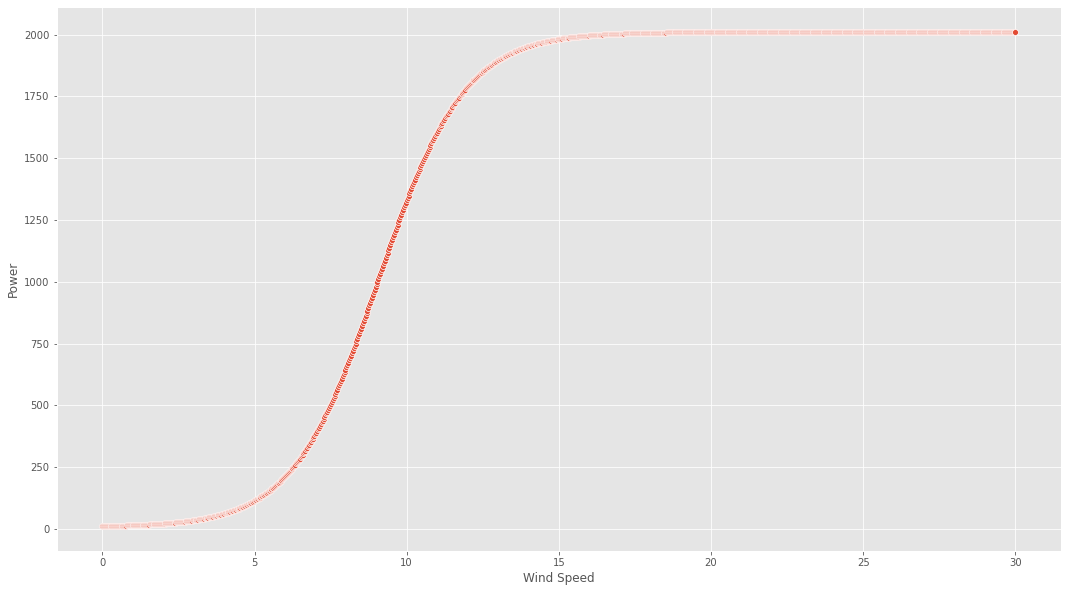

In [20]:
# Visualise dfx:
sns.scatterplot(data=dfx, x='Wind Speed', y='Power');

In [21]:
# Define parameters: vestas V80
a, m, n, t = 2011.1, 2.6650, 622.922, 1.40900

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

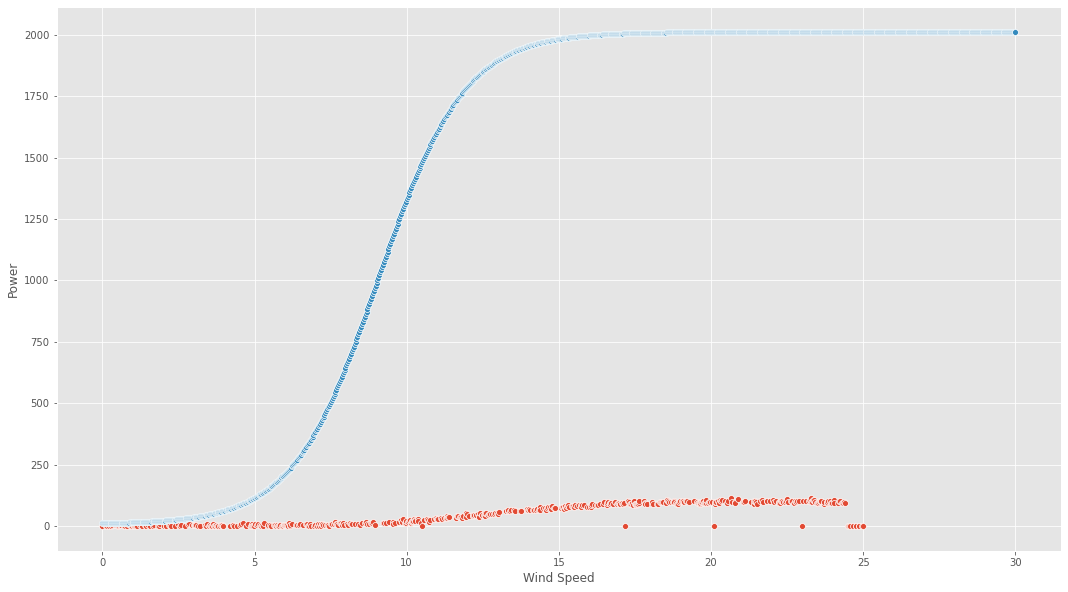

In [22]:
sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y='Power');

oops...

Just to point out, this is the same output shown in the lecture video, so I am not entirely sure where to go from here...

Perhaps we need to use a differnt model of WT:

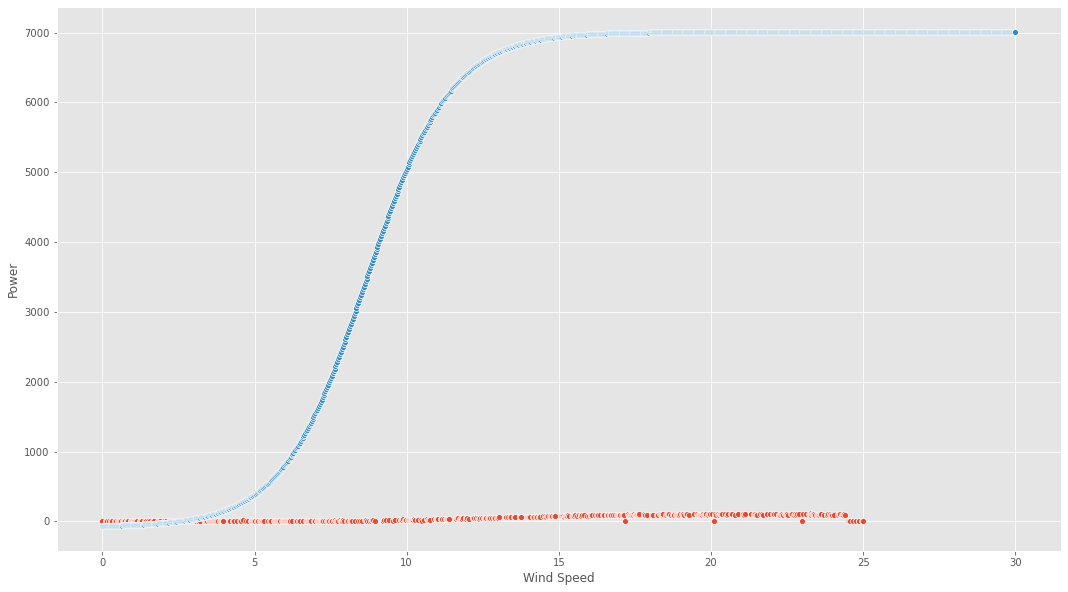

In [23]:
# Define parameters: Vestas V164
a, m, n, t = 7010.9, -6.1620, 532.502, 1.3810

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

dfx = pd.DataFrame({'Wind Speed': u, 'Power': P_u})

sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y='Power');

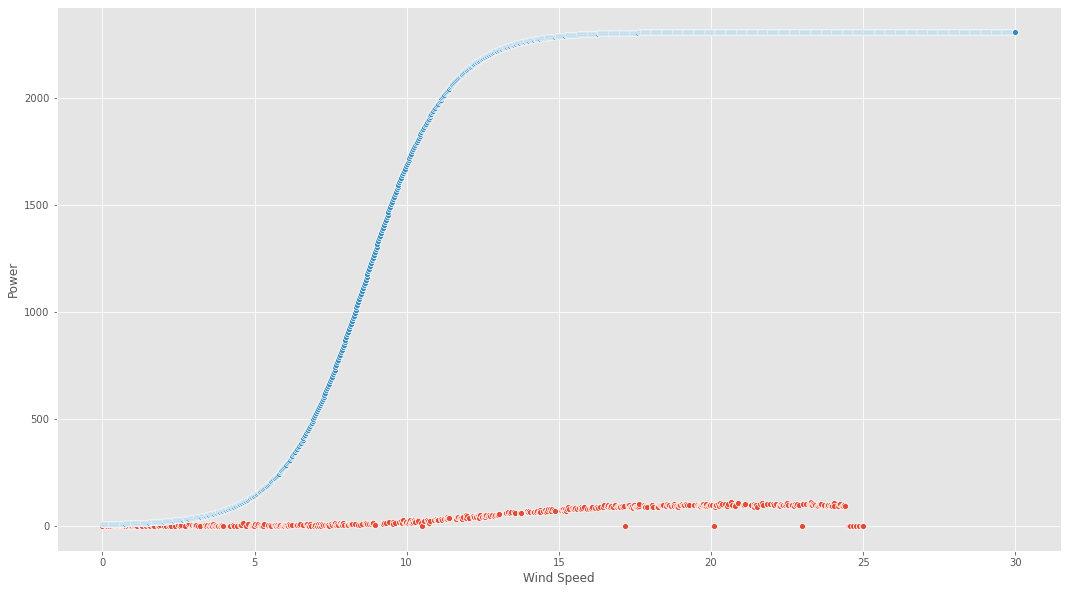

In [24]:
# Define parameters: Siemens 107
a, m, n, t = 2310.4, 1.7140, 667.839, 1.3320

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

dfx = pd.DataFrame({'Wind Speed': u, 'Power': P_u})

sns.scatterplot(data=df, x='speed', y='power')
sns.scatterplot(data=dfx, x='Wind Speed', y='Power')

Looks like the parameters of the models given in the article [3] are not related to our dataset.

It kind of looks like it may be the square of the other function, perhaps we can take the square root of the outputs and try that...

In [25]:
dfx['Power']

0         9.375090
1         9.453530
2         9.533754
3         9.615801
4         9.699713
          ...     
995    2310.399721
996    2310.399728
997    2310.399734
998    2310.399740
999    2310.399745
Name: Power, Length: 1000, dtype: float64

In [26]:
dfx_Power_numpy = dfx['Power'].values

In [27]:
# Create an empty list for years saved:
PwrSq = []

# populate - Works well because both lists remain ordered relative to the other.
for i in range(1000):
    if dfx_Power_numpy[i] >= 0:
        i = math.sqrt(i)
    PwrSq.append(i)

P_Sqrt = np.array(PwrSq)
P_Sqrt

array([ 0.        ,  1.        ,  1.41421356,  1.73205081,  2.        ,
        2.23606798,  2.44948974,  2.64575131,  2.82842712,  3.        ,
        3.16227766,  3.31662479,  3.46410162,  3.60555128,  3.74165739,
        3.87298335,  4.        ,  4.12310563,  4.24264069,  4.35889894,
        4.47213595,  4.58257569,  4.69041576,  4.79583152,  4.89897949,
        5.        ,  5.09901951,  5.19615242,  5.29150262,  5.38516481,
        5.47722558,  5.56776436,  5.65685425,  5.74456265,  5.83095189,
        5.91607978,  6.        ,  6.08276253,  6.164414  ,  6.244998  ,
        6.32455532,  6.40312424,  6.4807407 ,  6.55743852,  6.63324958,
        6.70820393,  6.78232998,  6.8556546 ,  6.92820323,  7.        ,
        7.07106781,  7.14142843,  7.21110255,  7.28010989,  7.34846923,
        7.41619849,  7.48331477,  7.54983444,  7.61577311,  7.68114575,
        7.74596669,  7.81024968,  7.87400787,  7.93725393,  8.        ,
        8.06225775,  8.1240384 ,  8.18535277,  8.24621125,  8.30

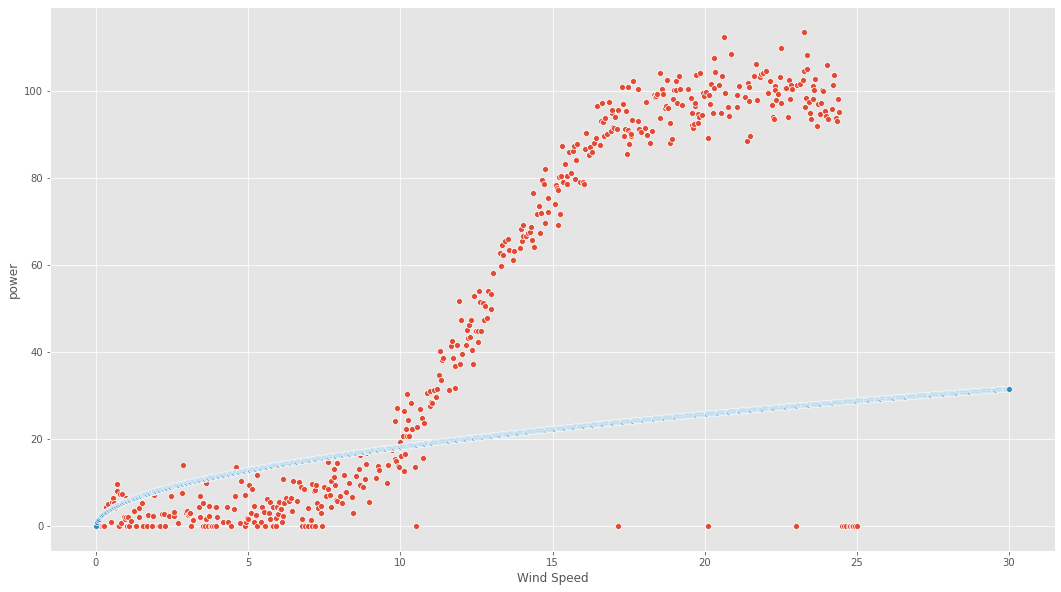

In [28]:
# Define parameters: vestas V80
a, m, n, t = 2011.1, 2.6650, 622.922, 1.40900

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

# Visualise both:
sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y=P_Sqrt);

Unfortunately not. Looking at the data, the max output of our dataset is 20 times less than that of the given parameters in the article. Perhaps dividing the output by 20 will bring us closer to understanding what is going wrong:

In [29]:
# Try dividing by 20, as dfx max output is 20 time df's:
PwDiv20 = []

for i in range(1000):
    if dfx_Power_numpy[i] >= 0:
        i = i / 20
    PwDiv20.append(i)

Div20 = np.array(PwDiv20)
Div20

array([ 0.  ,  0.05,  0.1 ,  0.15,  0.2 ,  0.25,  0.3 ,  0.35,  0.4 ,
        0.45,  0.5 ,  0.55,  0.6 ,  0.65,  0.7 ,  0.75,  0.8 ,  0.85,
        0.9 ,  0.95,  1.  ,  1.05,  1.1 ,  1.15,  1.2 ,  1.25,  1.3 ,
        1.35,  1.4 ,  1.45,  1.5 ,  1.55,  1.6 ,  1.65,  1.7 ,  1.75,
        1.8 ,  1.85,  1.9 ,  1.95,  2.  ,  2.05,  2.1 ,  2.15,  2.2 ,
        2.25,  2.3 ,  2.35,  2.4 ,  2.45,  2.5 ,  2.55,  2.6 ,  2.65,
        2.7 ,  2.75,  2.8 ,  2.85,  2.9 ,  2.95,  3.  ,  3.05,  3.1 ,
        3.15,  3.2 ,  3.25,  3.3 ,  3.35,  3.4 ,  3.45,  3.5 ,  3.55,
        3.6 ,  3.65,  3.7 ,  3.75,  3.8 ,  3.85,  3.9 ,  3.95,  4.  ,
        4.05,  4.1 ,  4.15,  4.2 ,  4.25,  4.3 ,  4.35,  4.4 ,  4.45,
        4.5 ,  4.55,  4.6 ,  4.65,  4.7 ,  4.75,  4.8 ,  4.85,  4.9 ,
        4.95,  5.  ,  5.05,  5.1 ,  5.15,  5.2 ,  5.25,  5.3 ,  5.35,
        5.4 ,  5.45,  5.5 ,  5.55,  5.6 ,  5.65,  5.7 ,  5.75,  5.8 ,
        5.85,  5.9 ,  5.95,  6.  ,  6.05,  6.1 ,  6.15,  6.2 ,  6.25,
        6.3 ,  6.35,

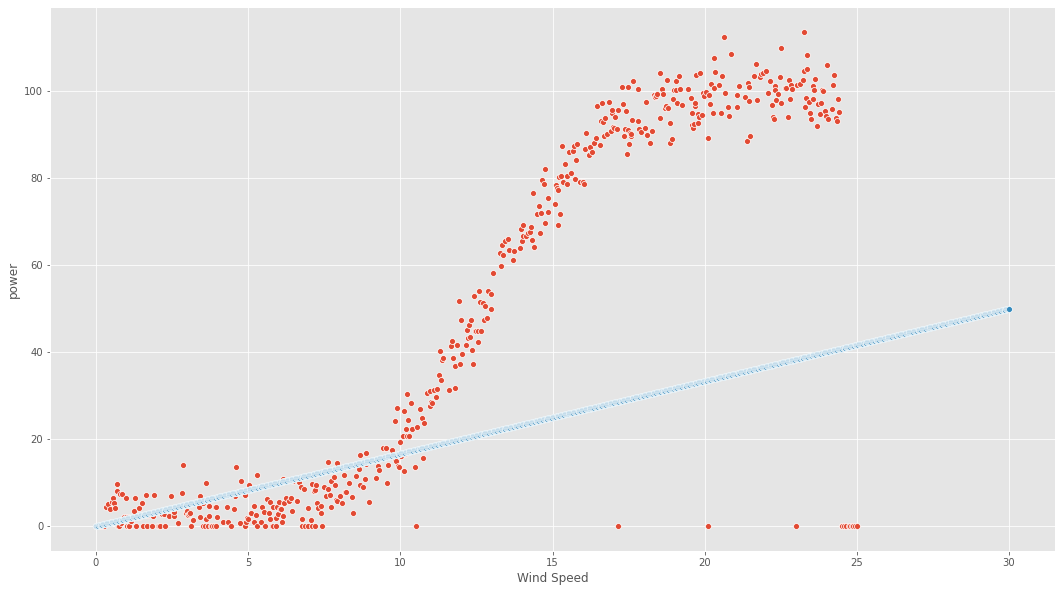

In [30]:
# Define parameters: vestas V80
a, m, n, t = 2011.1, 2.6650, 622.922, 1.40900

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

# Visualise both: try dividing by 20 since max output is 20 times higher.
sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y=Div20);

No, obviously we need to retain the fidelity of the output, so it must be to do with the parameters.

I have noticed that 'a' seems to be the maximum power output of our first equation for P_u. By looking at our dataset, I found that the maximum output for that data is around 103.322. Inputting that into the parameters gives us something much closer:

Then messing around with the other parameters a bit we get this, although admittedly I don't really understand what the other three parameters represent:

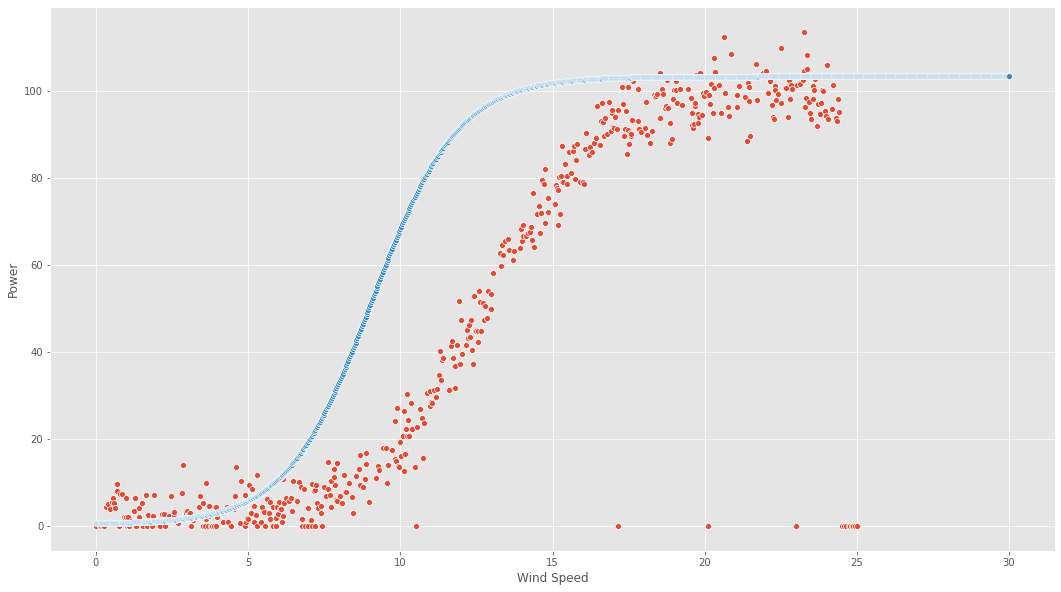

In [31]:
# Define parameters: vestas V80
a, m, n, t = 103.322, 2.6650, 622.922, 1.40900

u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

dfx = pd.DataFrame({'Wind Speed': u, 'Power': P_u})

sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y='Power');

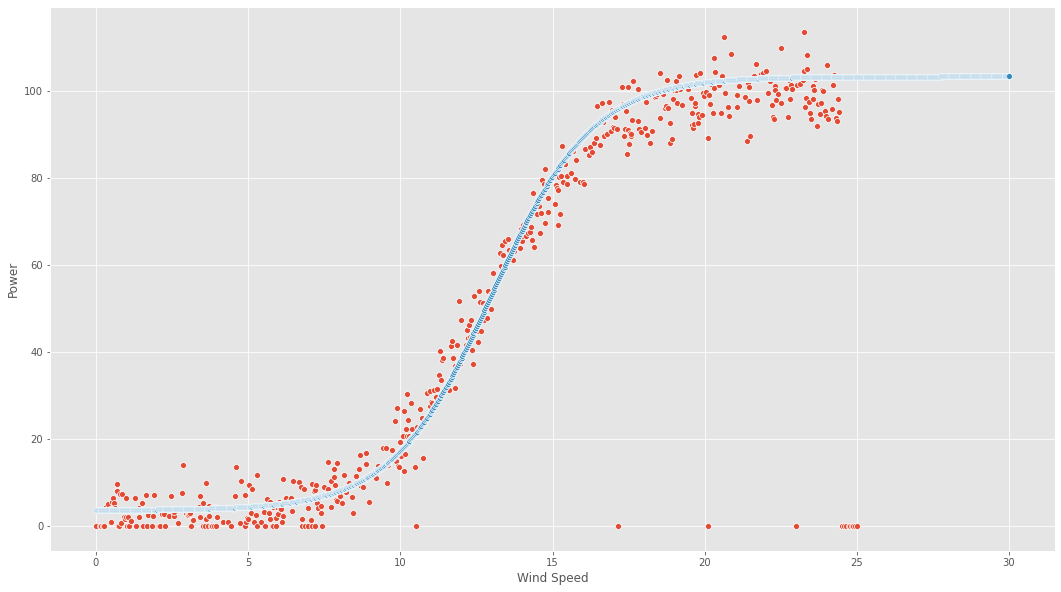

In [32]:
# Define parameters: vestas V80
a, m, n, t = 103.322, 100, 2800, 1.64


u = np.linspace(0.0, 30.0, 1000)

# Express above equation in python:
P_u = a * (1.0 + m * np.exp(-u / t)) / (1.0 + n * np.exp(-u / t))

dfx = pd.DataFrame({'Wind Speed': u, 'Power': P_u})

sns.scatterplot(data=df, x='speed', y='power');
sns.scatterplot(data=dfx, x='Wind Speed', y='Power');